# Importing Necessary Libraries

In [3]:
# These are used to handle data laoding directly from Kaggle
import requests
from zipfile import ZipFile
from io import BytesIO

# These are used to manipulate the dataset & visualize it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules & packages for modelling, predication, and evaluation
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

#Creating Machine learning Pipeline for deployment
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Feature Selection
# from sklearn.

#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Importing Training Data

In [4]:
# URL of the zip file
zip_url = 'https://storage.googleapis.com/kagglesdsdata/competitions/3316/31070/Train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1716060504&Signature=a9hoi651rY6%2FGr70yyMCpTq3X%2F7O9%2B%2B2eDduwRFKoBaE1pcpIoyQkk2BST838b2IIN%2BrvUsZhNXEf7QRqUS8kqUoM7N9DwRqM%2FAL%2FXTG2%2FWRZyjQLnl995GH1L9wOaZrc1fiqoK4aKhbUhuVprfcQUaImyr912v18W%2FLEYPq2%2BFhiL%2Bv6851lIPiDpAqUQxs11qY0bgWZrG7LiXl5EosxMXIelG4nj9jgIKXRRwiddVWG12lWo6%2Bl5MK2FM8LpUqc3zkxsqKB5BuQesAk0JIwNV2bAnU%2FMvEonkqSdT6JaNmy74AfMEgmahc3%2BEsoKgil9wjSxhoo7DDmtQDLMgB0Q%3D%3D&response-content-disposition=attachment%3B+filename%3DTrain.zip'
# Download the zip file
response = requests.get(zip_url)
# Check if the request was successful
if response.status_code == 200:
    # Read the zip file content
    with ZipFile(BytesIO(response.content)) as z:
        # Extract the file names from the zip
        file_list = z.namelist()

        # Assuming there's only one CSV file in the zip archive
        csv_filename = file_list[0]

        # Read the CSV file into a DataFrame
        with z.open(csv_filename) as csv_file:
            df = pd.read_csv(csv_file, low_memory=False, parse_dates=['saledate'])
else:
    print("Failed to download the zip file")

In [5]:
# Set the display format for floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.00,2004,68.00,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.00,1996,"4,640.00",Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.00,2001,"2,838.00",High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.00,2001,"3,486.00",High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.00,2007,722.00,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

In [6]:
# Determining features that act as a unique identifier
for col in df.columns:
  # Columns that have a different value per sample
  if len(df[col]) == df[col].nunique():
    print(col)
  # Columns that have the same value for all samples
  elif df[col].nunique == 1:
    print(col)

SalesID


## Summary Statistics

### Numerical Attributes

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
SalesID,"401,125.00","1,919,712.52","1,139,246.00","1,418,371.00","1,639,422.00","2,242,707.00","6,333,342.00","909,021.49"
SalePrice,"401,125.00","31,099.71","4,750.00","14,500.00","24,000.00","40,000.00","142,000.00","23,036.90"
MachineID,"401,125.00","1,217,902.52",0.00,"1,088,697.00","1,279,490.00","1,468,067.00","2,486,330.00","440,991.95"
ModelID,"401,125.00","6,889.70",28.00,"3,259.00","4,604.00","8,724.00","37,198.00","6,221.78"
datasource,"401,125.00",134.67,121.00,132.00,132.00,136.00,172.00,8.96
auctioneerID,"380,989.00",6.56,0.00,1.00,2.00,4.00,99.00,16.98
YearMade,"401,125.00","1,899.16","1,000.00","1,985.00","1,995.00","2,000.00","2,013.00",291.80
MachineHoursCurrentMeter,"142,765.00","3,457.96",0.00,0.00,0.00,"3,025.00","2,483,300.00","27,590.26"
saledate,401125,2004-08-02 07:47:13.986413184,1989-01-17 00:00:00,2000-10-07 00:00:00,2006-03-23 00:00:00,2009-03-24 00:00:00,2011-12-30 00:00:00,NaN


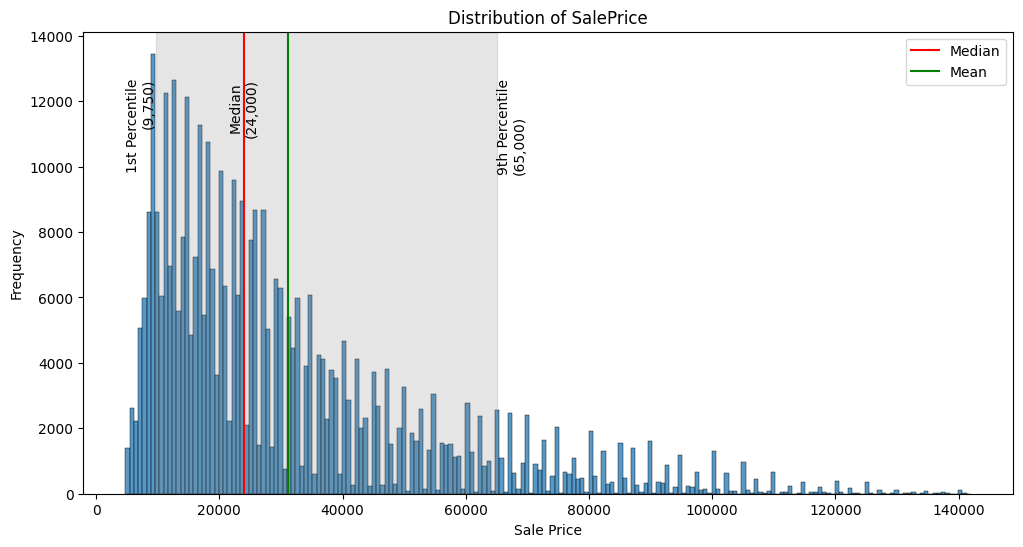

In [8]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate statistics
median_SalePrice = df['SalePrice'].median()
mean_SalePrice = df['SalePrice'].mean()
first_percentile = df['SalePrice'].quantile(0.1)
ninth_percentile = df['SalePrice'].quantile(0.9)

# Plot histogram
ax = sns.histplot(data=df, x='SalePrice')
ax.axvline(x=median_SalePrice, color='red', linestyle='-', label='Median')
ax.axvline(x=mean_SalePrice, color='green', linestyle='-', label='Mean')
ax.axvspan(first_percentile, ninth_percentile, alpha= 0.2, color='grey')

# Set labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')

# Add text for percentile values
ax.text(first_percentile, ax.get_ylim()[1]*0.9, f'1st Percentile\n({first_percentile:,.0f})', ha='right', va='top', rotation=90)
ax.text(median_SalePrice, ax.get_ylim()[1]*0.9, f'Median\n({median_SalePrice:,.0f})', ha='center', va='top', rotation=90)
ax.text(ninth_percentile, ax.get_ylim()[1]*0.9, f'9th Percentile\n({ninth_percentile:,.0f})', ha='left', va='top', rotation=90)

plt.legend()

plt.show();

In [20]:
#making sure there are no missing values in ['MachineID', 'ModelID', 'datasource', 'auctioneerID'] prior to turning them into categorical values
cols = ['MachineID', 'ModelID', 'datasource', 'auctioneerID']
df[cols].isna().sum()

MachineID           0
ModelID             0
datasource          0
auctioneerID    20136
dtype: int64

In [22]:
# since auctioneerID has missing values, it should be further investigated prior to making any changes
sorted(df.auctioneerID.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 99.0,
 nan]

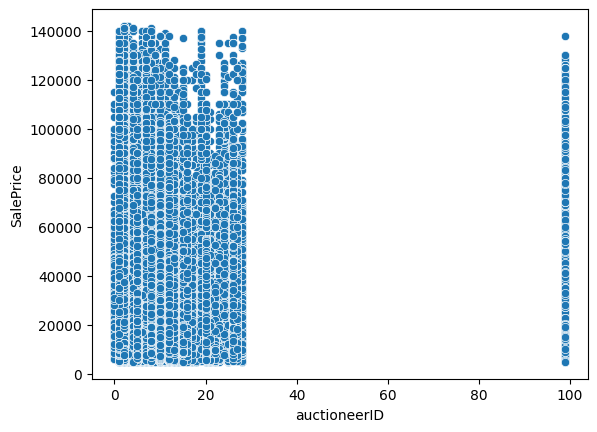

In [19]:
sns.scatterplot(data=df, x='auctioneerID', y='SalePrice');

In [28]:
df.auctioneerID.value_counts().sort_values(ascending=False)
print(df.auctioneerID.mode()[0])
print(df.auctioneerID.median())

1.0
2.0


In [29]:
df.auctioneerID.value_counts().sort_values(ascending=False)

auctioneerID
1.00     185310
2.00      56440
3.00      29076
4.00      20474
6.00      11950
99.00     11406
7.00       7846
8.00       7203
5.00       7002
10.00      5790
9.00       4764
11.00      3823
12.00      3418
13.00      3031
18.00      2359
14.00      2277
20.00      2238
19.00      2074
16.00      1792
15.00      1680
21.00      1601
22.00      1429
24.00      1357
23.00      1322
17.00      1275
27.00      1150
25.00       959
28.00       860
26.00       676
0.00        407
Name: count, dtype: int64

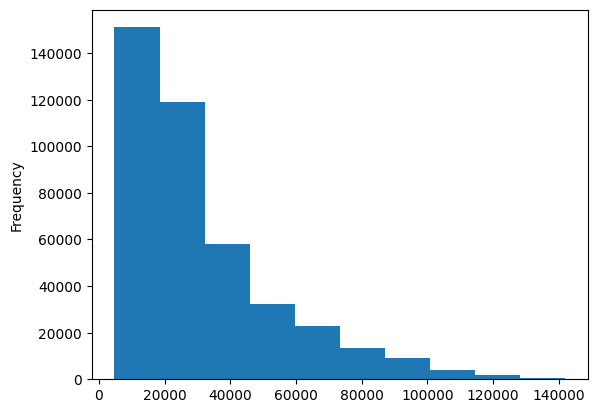

In [ ]:
df.SalePrice.plot.hist();

## Parsing Dates

In [ ]:
with ZipFile(BytesIO(response.content)) as z:
  file_list = z.namelist()
  csv_filename = file_list[0]
  with z.open(csv_filename) as csv_file:
    df = pd.read_csv(csv_file, parse_dates=['saledate'], low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.saledate.dtype

dtype('<M8[ns]')

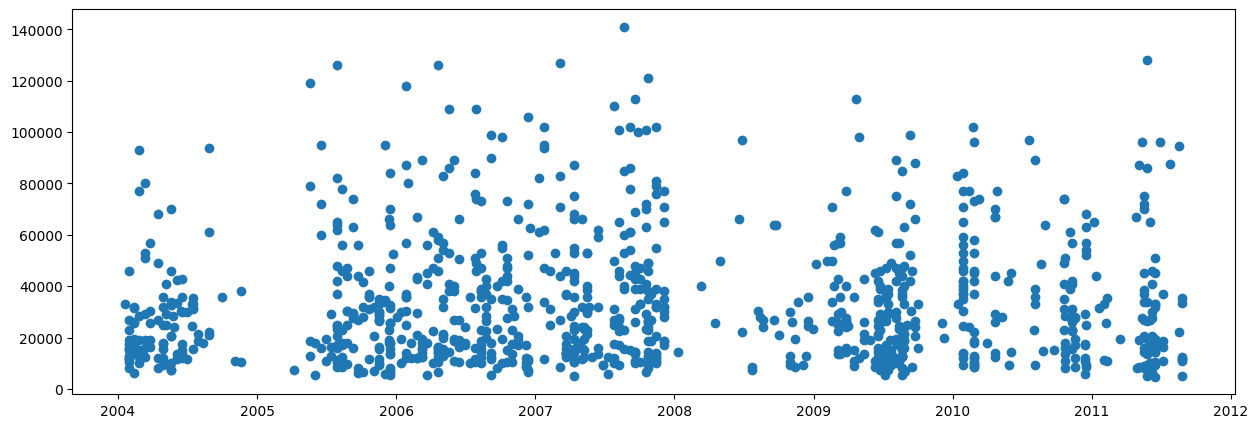

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

In [ ]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [ ]:
df_temp = df.copy()

In [ ]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay']= df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [ ]:
df_temp.drop(columns='saledate', axis=1, inplace=True)

In [ ]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [ ]:
cat_frame = df_temp.select_dtypes('object')
cat_frame

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,NaN,D38E,D38,E,NaN,NaN,NaN,"Track Type Tractor, Dozer - 75.0 to 85.0 Horse...",California,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,NaN,2064,2064,NaN,NaN,NaN,NaN,Skid Steer Loader - 1751.0 to 2201.0 Lb Operat...,California,SSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,NaN,337G,337,G,NaN,NaN,Mini,"Hydraulic Excavator, Track - 5.0 to 6.0 Metric...",California,TEX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,NaN,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,California,MG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in cat_frame.columns:
    df_temp[col]=df_temp[col].astype('category').cat.as_ordered()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [ ]:
numeric_missing_values = df_temp.select_dtypes(['float', 'int']).isna().sum()
numeric_missing_cols = numeric_missing_values[numeric_missing_values>0].index.tolist()
numeric_missing_cols

['auctioneerID', 'MachineHoursCurrentMeter']

In [ ]:
df_temp['auctioneerID'].fillna(df_temp['auctioneerID'].median(), inplace=True)
df_temp['MachineHoursCurrentMeter'].fillna(df_temp['MachineHoursCurrentMeter'].median(), inplace=True)

In [ ]:
cat_mv = df_temp.select_dtypes('category').isna().sum().index.tolist()
cat_mv

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [ ]:
for col in cat_mv:
    df_temp[col] = pd.Categorical(df_temp[col]).codes + 1

In [ ]:
df_temp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

## Modelling

In [ ]:
model = RandomForestRegressor()
model.fit(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

RandomForestRegressor()

In [ ]:
model.score(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

0.9875660677691624

In [ ]:
training_set = df_temp[df_temp['saleYear'] < 2012]
validation_set = df_temp[df_temp['saleYear'] >= 2012]

In [ ]:
model.fit(training_set.drop('SalePrice', axis=1), training_set['SalePrice'])

RandomForestRegressor()

In [ ]:
train_score = model.score(training_set.drop('SalePrice', axis=1), training_set['SalePrice'])
val_score = model.score(validation_set.drop('SalePrice', axis=1), validation_set['SalePrice'])

In [ ]:
print(train_score)
print(val_score)

0.9875469625128814
0.8727294557606743


In [ ]:
y_pred_train = model.predict(training_set.drop('SalePrice', axis=1))
y_pred_val = model.predict(validation_set.drop('SalePrice', axis=1))
train_RMSLE = mean_squared_log_error(training_set['SalePrice'], y_pred_train) ** 0.5
val_RMSLE = mean_squared_log_error(validation_set['SalePrice'], y_pred_val) ** 0.5
print(train_RMSLE)
print(val_RMSLE)

0.08420370238063825
0.25468489125758975


Hyperparameter tuning with RandomizedSearchCV

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_dist = {'n_estimators': np.arange(10, 100, 10),
              "max_depth": [None, 3, 5, 10],
              "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2),
              "max_features": [0.5, 1, "sqrt", "auto"],
              "max_samples": [10000]}
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                              param_distributions=param_dist,
                              n_iter=3,
                              cv=5,
                              verbose=True)
rs_model.fit(training_set.drop('SalePrice', axis=1), training_set['SalePrice'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
model.feature_importances_

array([5.00203719e-02, 1.66655454e-02, 3.26148967e-02, 4.42985035e-04,
       4.51597651e-03, 2.61787582e-01, 3.27830676e-03, 1.24836743e-03,
       2.02434780e-02, 7.87901653e-02, 5.20997967e-02, 4.84474742e-03,
       4.17759072e-03, 2.30578036e-01, 3.78563779e-02, 8.93622915e-03,
       2.40061643e-04, 2.43161136e-04, 1.71316948e-03, 8.89539645e-03,
       4.71948855e-04, 3.75581418e-05, 6.34400049e-04, 1.91659685e-04,
       1.62010916e-03, 2.84078065e-05, 8.00082034e-04, 6.90599605e-03,
       4.51063365e-04, 9.83817741e-04, 6.49194683e-03, 2.90736976e-03,
       2.38796974e-03, 6.40679054e-03, 8.50197554e-04, 2.11259457e-03,
       1.15237224e-03, 3.00434426e-02, 1.13573163e-05, 4.97260314e-06,
       1.96697761e-04, 1.16606806e-03, 1.34668390e-03, 7.82254834e-04,
       2.63471450e-04, 4.99316093e-04, 3.93429092e-04, 1.78848344e-03,
       1.00272857e-03, 2.21699029e-04, 2.69569612e-04, 7.61032318e-02,
       3.36412314e-03, 9.27804757e-03, 4.64629064e-03, 1.49916072e-02])

In [ ]:
feature_importance = (pd.DataFrame({"Features": training_set.drop('SalePrice', axis=1).columns, "Feature_Importance": model.feature_importances_}).
                      sort_values("Feature_Importance", ascending= True).
                      reset_index(drop=True))

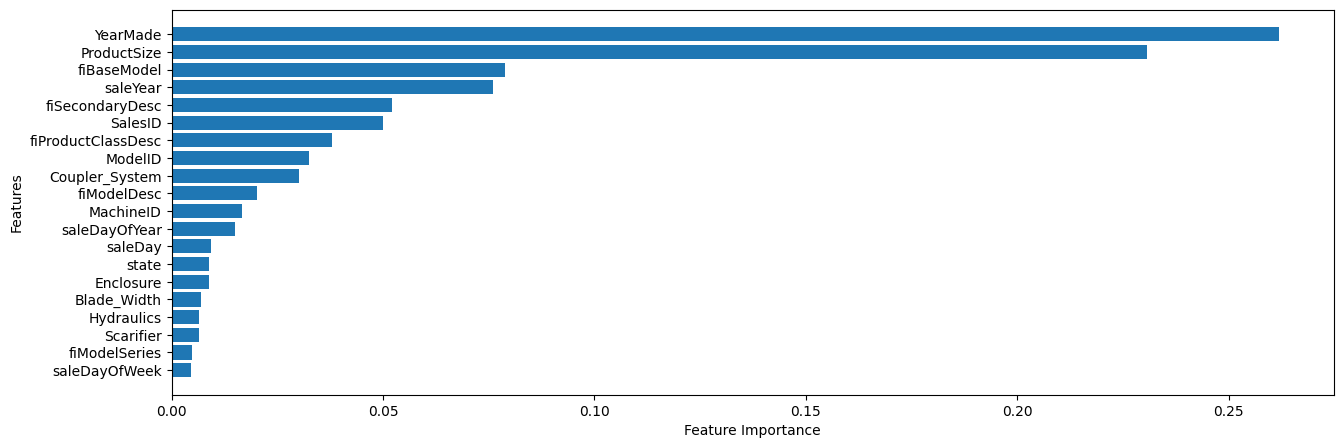

In [ ]:
n = 20
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(feature_importance["Features"][-n:], feature_importance["Feature_Importance"][-n:])
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance");

Further Steps to be considered:

In [ ]:
# determine feature importance
# create pipelines for preprocessing
# Forward floating feature selection
# Test data
  # importing test data
  # preprocess test data
  # make predictions on test data